<a href="https://colab.research.google.com/github/Farouk96/Predict_tags_question/blob/main/Questions_tags_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from matplotlib import pyplot

import time

import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,NMF,PCA

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/QueryResults.csv', sep=',')

In [ ]:
data.head(5)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,65000001,1,NaN,NaN,2020-11-25 07:14:44,NaN,0,718.0,<pre><code>import javax.swing.*;\n\nimport jav...,14404483.0,NaN,466862.0,NaN,2021-02-14 11:19:29,2021-02-14 11:19:29,how to fix the cannot find symbol in actionPer...,<java><error-handling><actionlistener>,1.0,3,NaN,2021-02-14 11:19:33,NaN,CC BY-SA 4.0
1,65000002,2,NaN,64993028.0,2020-11-25 07:14:45,NaN,0,NaN,"<p>you can try this code, you might need to se...",3021161.0,NaN,NaN,NaN,NaN,2020-11-25 07:14:45,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
2,65000003,1,65002545.0,NaN,2020-11-25 07:14:47,NaN,0,56.0,<p>Please the take this example:</p>\n<pre cla...,3370568.0,NaN,3370568.0,NaN,2020-11-25 07:22:10,2020-11-25 10:11:52,Why types inside the .forEach callback functio...,<typescript>,1.0,5,NaN,NaN,NaN,CC BY-SA 4.0
3,65000004,1,NaN,NaN,2020-11-25 07:14:49,NaN,1,65.0,<p>Is there a way to include a value from the ...,370039.0,NaN,NaN,NaN,NaN,2020-11-25 07:14:49,Getting username from flask session into gunic...,<python><flask><gunicorn>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0
4,65000007,1,NaN,NaN,2020-11-25 07:14:58,NaN,0,25.0,<p>I am trying to make a connection from <stro...,8412603.0,NaN,NaN,NaN,NaN,2020-11-25 07:14:58,Make Connection Using Sybase in Laravel 5.2,<php><laravel>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0


In [ ]:
data.shape

(50000, 23)

In [ ]:
data.isnull().sum()

Id                           0
PostTypeId                   0
AcceptedAnswerId         41249
ParentId                 23864
CreationDate                 0
DeletionDate             50000
Score                        0
ViewCount                26174
Body                        19
OwnerUserId                522
OwnerDisplayName         49470
LastEditorUserId         31928
LastEditorDisplayName    49862
LastEditDate             31792
LastActivityDate             0
Title                    26174
Tags                     26174
AnswerCount              26174
CommentCount                 0
FavoriteCount            47979
ClosedDate               48629
CommunityOwnedDate       49963
ContentLicense               0
dtype: int64

In [ ]:
#Eliminer toutes les lignes ne contient pas des tags
data.drop(data[data['Tags'].isnull()].index,axis=0,inplace=True)
data.isnull().sum()

Id                           0
PostTypeId                   0
AcceptedAnswerId         15075
ParentId                 23826
CreationDate                 0
DeletionDate             23826
Score                        0
ViewCount                    0
Body                         0
OwnerUserId                364
OwnerDisplayName         23457
LastEditorUserId         13073
LastEditorDisplayName    23727
LastEditDate             12976
LastActivityDate             0
Title                        0
Tags                         0
AnswerCount                  0
CommentCount                 0
FavoriteCount            21805
ClosedDate               22455
CommunityOwnedDate       23826
ContentLicense               0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


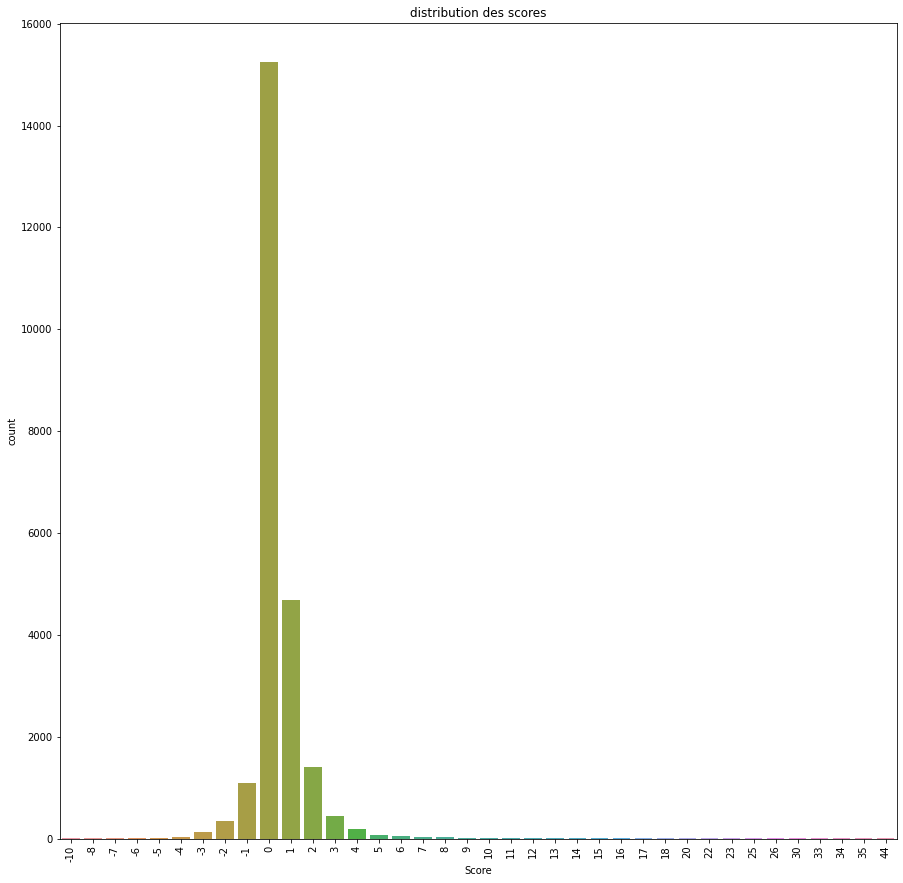

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(data['Score'])
plt.xticks(rotation=90)
plt.title('distribution des scores')
plt.show()

In [ ]:
data=data[data['Score']>=0]

In [ ]:
data.shape

(22205, 23)

In [ ]:
data.head(1)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,65000001,1,NaN,NaN,2020-11-25 07:14:44,NaN,0,718.0,<pre><code>import javax.swing.*;\n\nimport jav...,14404483.0,NaN,466862.0,NaN,2021-02-14 11:19:29,2021-02-14 11:19:29,how to fix the cannot find symbol in actionPer...,<java><error-handling><actionlistener>,1.0,3,NaN,2021-02-14 11:19:33,NaN,CC BY-SA 4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


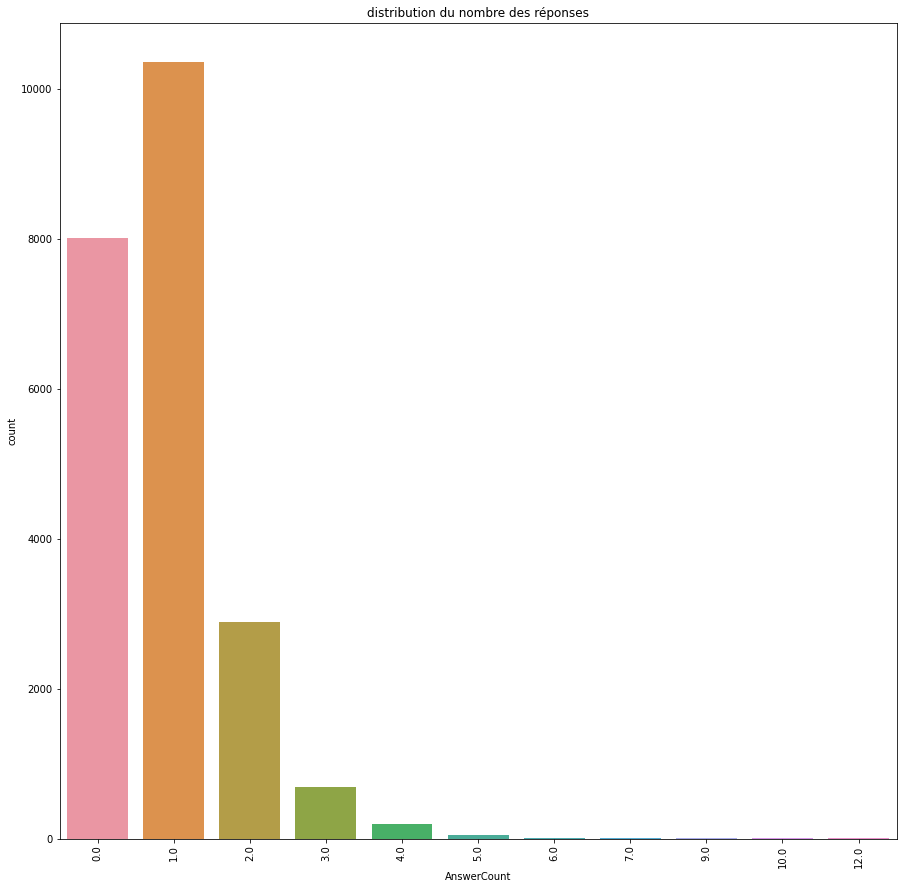

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(data['AnswerCount'])
plt.xticks(rotation=90)
plt.title('distribution du nombre des réponses')
plt.show()

In [ ]:
data=data[data['AnswerCount']>0]
data.shape

(14191, 23)

In [ ]:
data=data[['Body','Title','Tags']]

#Tags

In [ ]:
data['Tags']=data['Tags'].astype(str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14191 entries, 0 to 49991
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    14191 non-null  object
 1   Title   14191 non-null  object
 2   Tags    14191 non-null  object
dtypes: object(3)
memory usage: 443.5+ KB


In [ ]:
data['Tags'] = data['Tags'].apply(lambda x: x.split('>'))
data['Tags'] = data['Tags'].apply(lambda x: x[:-1])
data['Tags'] 

0                [<java, <error-handling, <actionlistener]
2                                            [<typescript]
5                                  [<c, <cmock, <ceedling]
6                                                   [<git]
10             [<json, <reactjs, <django, <image, <nested]
                               ...                        
49973                               [<c#, <string, <loops]
49977    [<python, <matplotlib, <mesh, <triangulation, ...
49983                  [<python, <django, <attributeerror]
49985                              [<scala, <apache-spark]
49991     [<python, <memory-management, <twitter, <pickle]
Name: Tags, Length: 14191, dtype: object

In [ ]:
all_tags = [item for sublist in data['Tags'].values for item in sublist]
len(all_tags)

43042

In [ ]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

6926

In [ ]:
flat_list = [item for sublist in data['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]
tags_features

['<python',
 '<javascript',
 '<java',
 '<reactjs',
 '<html',
 '<r',
 '<c#',
 '<android',
 '<python-3.x',
 '<pandas',
 '<node.js',
 '<sql',
 '<php',
 '<css',
 '<c++',
 '<flutter',
 '<arrays',
 '<c',
 '<django',
 '<angular',
 '<mysql',
 '<dataframe',
 '<typescript',
 '<jquery',
 '<swift',
 '<json',
 '<laravel',
 '<vue.js',
 '<ios',
 '<firebase',
 '<amazon-web-services',
 '<react-native',
 '<dart',
 '<postgresql',
 '<kotlin',
 '<azure',
 '<excel',
 '<numpy',
 '<spring-boot',
 '<sql-server',
 '<list',
 '<mongodb',
 '<docker',
 '<tensorflow',
 '<regex',
 '<spring',
 '<api',
 '<asp.net-core',
 '<oracle',
 '<vba',
 '<linux',
 '<string',
 '<swiftui',
 '<android-studio',
 '<loops',
 '<git',
 '<matplotlib',
 '<express',
 '<powershell',
 '<bash',
 '<selenium',
 '<wordpress',
 '<kubernetes',
 '<.net',
 '<ggplot2',
 '<database',
 '<algorithm',
 '<ruby-on-rails',
 '<function',
 '<apache-spark',
 '<keras',
 '<web-scraping',
 '<dictionary',
 '<google-cloud-firestore',
 '<ruby',
 '<visual-studio-code',

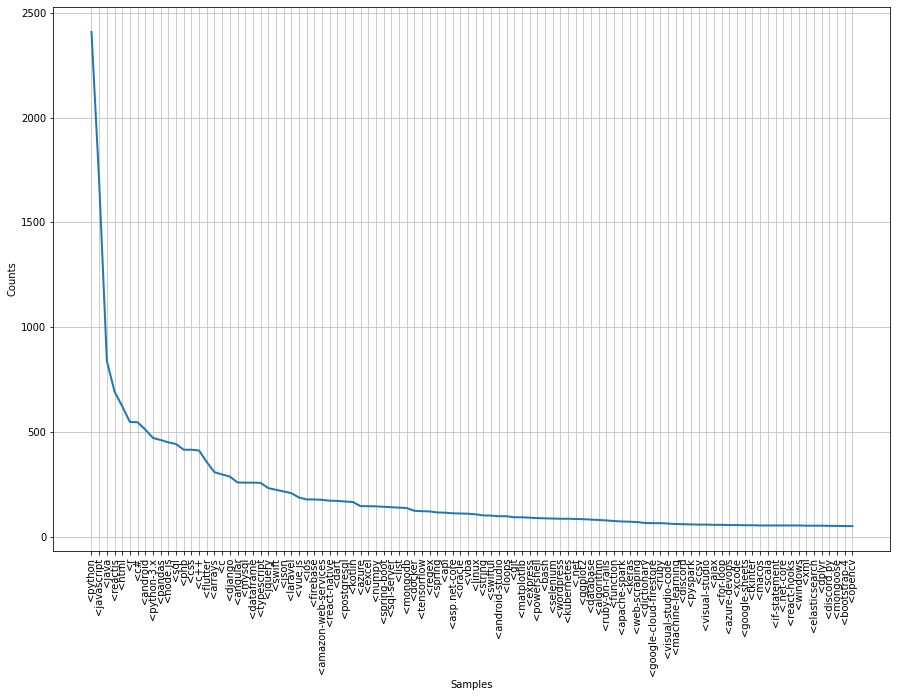

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [ ]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [ ]:
data['Tags'] = data['Tags'].apply(lambda x: most_common(x))
data['Tags'] = data['Tags'].apply(lambda x: x if len(x)>0 else None)

In [ ]:
data.dropna(subset=['Tags'], inplace=True)

In [ ]:
data.shape

(12230, 3)

#Body
Dans les deux colonnes suivantes : Corps et Titre, je vais utiliser beaucoup de traitement de texte :


*   Retrait du format html

*   Lowering text
*   Transformation d'abréviations

*   Suppression de la ponctuation (mais maintien de mots comme c# puisque c'est le tag le plus populaire)

*   Lemmatisation des mots
*    Suppression des stop words





In [ ]:
# Converting html to text in the body

data['Body'] = data['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [ ]:
data.Body.index

Int64Index([    0,     2,     5,     6,    10,    11,    14,    16,    24,
               29,
            ...
            49935, 49939, 49946, 49947, 49967, 49973, 49977, 49983, 49985,
            49991],
           dtype='int64', length=12230)

In [ ]:
data['Body'][5]

'I am trying to mock a header which is included by a source file I am testing.\nThe header begins with the following:\n#if defined(ICM42600)\n#define ICM_WHOAMI ICM42600_WHOAMI\n#elif defined(ICM42602)\n#define ICM_WHOAMI ICM42602_WHOAMI\n#elif defined(ICM42605)\n#define ICM_WHOAMI ICM42605_WHOAMI\n#elif defined(ICM42622)\n#define ICM_WHOAMI ICM42622_WHOAMI\n#elif defined(ICM42686)\n#define ICM_WHOAMI ICM42686_WHOAMI\n#elif defined(ICM42688)\n#define ICM_WHOAMI ICM42688_WHOAMI\n#elif defined(ICM42608)\n#define ICM_WHOAMI ICM42608_WHOAMI\n#elif defined(IIM42623)\n#define ICM_WHOAMI IIM42623_WHOAMI\n#elif defined(IIM42624)\n#define ICM_WHOAMI IIM42624_WHOAMI\n#elif defined(IIM42625)\n#define ICM_WHOAMI IIM42625_WHOAMI\n#elif defined(ICM40608)\n#define ICM_WHOAMI ICM40608_WHOAMI\n#else\n#error "Please define which ICM variant is targeted. Possible values: ICM42600, ICM42602, ICM42605, ICM42686, ICM42688, ICM42622, ICM42608, ICM4068"\n#endif\n\nand I am attempting to mock it like so:\n#def

In [ ]:
def clean_text(text):
      text = text.lower()
      text = re.sub(r"what's", "what is ", text)
      text = re.sub(r"\'s", " ", text)
      text = re.sub(r"\'ve", " have ", text)
      text = re.sub(r"can't", "can not ", text)
      text = re.sub(r"n't", " not ", text)
      text = re.sub(r"i'm", "i am ", text)
      text = re.sub(r"\'re", " are ", text)
      text = re.sub(r"\'d", " would ", text)
      text = re.sub(r"\'ll", " will ", text)
      text = re.sub(r"\'scuse", " excuse ", text)
      text = re.sub(r"\'\n", " ", text)
      text = re.sub(r"\'\xa0", " ", text)
      text = re.sub('\s+', ' ', text)
      text= re.sub('nan',' ',text)
      text= re.sub('null',' ',text)
      text= re.sub('func',' ',text)
      text= re.sub(r'[0-9]', ' ', text) # remove numbers
      #text= re.sub(r'(?:^| )\w(?:$| )', ' ', text)
      text = text.strip(' ')
      return text

In [ ]:
data['Body'] = data['Body'].apply(lambda x: clean_text(x))

In [ ]:
data['Body'][5]

'i am trying to mock a header which is included by a source file i am testing. the header begins with the following: #if defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #elif defined(iim     ) #define icm_whoami iim     _whoami #elif defined(iim     ) #define icm_whoami iim     _whoami #elif defined(iim     ) #define icm_whoami iim     _whoami #elif defined(icm     ) #define icm_whoami icm     _whoami #else #error "please define which icm variant is targeted. possible values: icm     , icm     , icm     , icm     , icm     , icm     , icm     , icm    " #endif and i am attempting to mock it like so: #define icm        #include "mock_

In [ ]:
token=ToktokTokenizer()

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [ ]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [ ]:
data['Body'] = data['Body'].apply(lambda x: clean_punct(x)) 

In [ ]:
data['Body'][5]

'i am trying to mock a header which is included by a source file i am testing the header begins with the following if defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined icm define icmwhoami icm whoami elif defined iim define icmwhoami iim whoami elif defined iim define icmwhoami iim whoami elif defined iim define icmwhoami iim whoami elif defined icm define icmwhoami icm whoami else error please define which icm variant is targeted possible values icm icm icm icm icm icm icm icm endif and i am attempting to mock it like so define icm include mockicm xxdefsh however i keep getting the following error when trying to run ceedling tests generating include list for icm xxdefsh buildtempicm xxdefsh error error please define which icm variant is targeted possible values

In [ ]:
data['Body'] = data['Body'].apply(lambda x: clean_text(x))

In [ ]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [ ]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [ ]:
data['Body'] = data['Body'].apply(lambda x: lemitizeWords(x)) 
data['Body'] = data['Body'].apply(lambda x: stopWordsRemove(x)) 

#Title

In [ ]:
data['Title'] = data['Title'].apply(lambda x: str(x))
data['Title'] = data['Title'].apply(lambda x: clean_text(x)) 
data['Title'] = data['Title'].apply(lambda x: clean_punct(x)) 
data['Title'] = data['Title'].apply(lambda x: lemitizeWords(x)) 
data['Title'] = data['Title'].apply(lambda x: stopWordsRemove(x)) 

# EDA

In [ ]:
no_topics = 20
text = data['Body']
no_top_words = 20

##LDA

In [ ]:
vectorizer_count_train=CountVectorizer(analyzer='word',
                                 min_df=0.05,
                                       max_df = 0.95,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=5000)

In [ ]:
TF_vct_matrix = vectorizer_count_train.fit_transform(text)

In [ ]:
#Optimiser lda par N° topics
topic=[]

for no_topics in range(10,30):
  lda_vct = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50
                                    ,random_state=11).fit(TF_vct_matrix)
  topic.append([no_topics,lda_vct.perplexity(TF_vct_matrix),lda_vct.score(TF_vct_matrix)])                                     

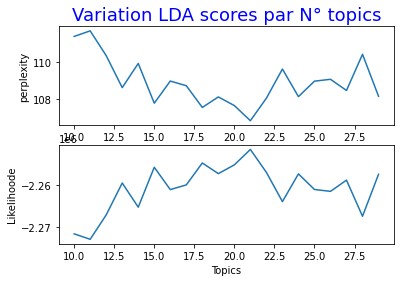

In [ ]:
topic_opt = pd.DataFrame(topic, columns=["N° topic", "perplexity","likelihood"])

# plot LDA Scores
plt.subplot(211)
sns.lineplot(data=topic_opt, x="N° topic", y="perplexity")
plt.ylabel("perplexity")
plt.title("Variation LDA scores par N° topics",
          fontsize=18,
          color="b")
plt.subplot(212)
sns.lineplot(data=topic_opt, x="N° topic", y="likelihood")
plt.xlabel("Topics")
plt.ylabel("Likelihoode")

plt.show()

In [ ]:
lda_vct = LatentDirichletAllocation(n_components=11, max_iter=5, learning_method='online', learning_offset=50
                                    ,random_state=11).fit(TF_vct_matrix)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")

display_topics(lda_vct, vectorizer_count_train.get_feature_names(), no_top_words)

--------------------------------------------
Topic 0:
int amp return include void main number else case size array code input output check tion variable table result write
--------------------------------------------
--------------------------------------------
Topic 1:
id var select tion query table name get result try order use new like create update add return object database
--------------------------------------------
--------------------------------------------
Topic 2:
string public new true class false private return test use void get set method try work object code call create
--------------------------------------------
--------------------------------------------
Topic 3:
row column script table would link like want result output code help thank follow one run create look appreciate python
--------------------------------------------
--------------------------------------------
Topic 4:
data user def database model create update api return get store use would try call want n

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##NMF

In [ ]:
#NMF by vect_count 
NMF_vct = NMF(n_components=11, max_iter=5,random_state=11).fit(TF_vct_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 5 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
display_topics(NMF_vct, vectorizer_count_train.get_feature_names(), no_top_words)

--------------------------------------------
Topic 0:
div class button style id type script input display html width title content form model color click page link field
--------------------------------------------
--------------------------------------------
Topic 1:
use data error get tion try code return like work would create table run user want find add set make
--------------------------------------------
--------------------------------------------
Topic 2:
file line import error open run python code app last print try call fail return command path create output build
--------------------------------------------
--------------------------------------------
Topic 3:
public string new private class void return get set import user view use id object method model try open int
--------------------------------------------
--------------------------------------------
Topic 4:
name id type input app text form would select user array create object path field version add string try file
-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Création du fichier

In [ ]:
import csv
data.to_csv('/content/drive/MyDrive/Questions_Tags_Exploration.csv',sep=',',encoding='utf-8')